Data Source : https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [195]:
file_path = r"C:\Users\loris\Desktop\Social Re\social_research_project\drugs_data\drug_consumption.csv"
data = pd.read_csv(r"C:\Users\loris\Desktop\Social Re\social_research_project\drugs_data\drug_consumption.csv", sep=',')

### Column values info

Database contains records for 1885 respondents. For each respondent 12 attributes are known: 
Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, 
and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity.

All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued.

In addition, participants were questioned concerning their use of 18 legal and illegal drugs 
(alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, 
methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers).

For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

Database contains 18 classification problems. Each of independent label variables contains seven classes: 
"Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

**Attribute Information:**

- **ID**: ID is number of record in original database. Cannot be related to participant. It can be used for reference only.

- **Age**: Age is the age of participant and has one of the values:
    - -0.95197: 18 - 24
    - -0.07854: 25 - 34
    - 0.49788: 35 - 44
    - 1.09449: 45 - 54
    - 1.82213: 55 - 64
    - 2.59171: 65+
- **Gender**: Gender is gender of participant:
    - 0.48246: Female
    - -0.48246: Male
- **Education**: Education is level of education of participant and has one of the values:
    - -2.43591: Left School Before 16 years
    - -1.73790: Left School at 16 years
    - -1.43719: Left School at 17 years
    - -1.22751: Left School at 18 years
    - -0.61113: Some College, No Certificate Or Degree
    - -0.05921: Professional Certificate/Diploma
    - 0.45468: University Degree
    - 1.16365: Masters Degree
    - 1.98437: Doctorate Degree
- **Country**: Country is country of current residence of participant and has one of the values:
    - -0.09765: Australia
    - 0.24923: Canada
    - -0.46841: New Zealand
    - -0.28519: Other
    - 0.21128: Republic of Ireland
    - 0.96082: UK
    - -0.57009: USA
- **Ethnicity**: Ethnicity is ethnicity of participant and has one of the values:
    - -0.50212: Asian
    - -1.10702: Black
    - 1.90725: Mixed-Black/Asian
    - 0.12600: Mixed-White/Asian
    - -0.22166: Mixed-White/Black
    - 0.11440: Other
    - -0.31685: White

**Nscore**: Nscore is NEO-FFI-R Neuroticism. Neuroticism is one of the Big Five higher-order personality traits in the study of psychology. Individuals who score high on neuroticism are more likely than average to be moody and to experience such feelings as anxiety, worry, fear, anger, frustration, envy, jealousy, guilt, depressed mood, and loneliness.

**EScore**: Escore (Real) is NEO-FFI-R Extraversion. Extraversion is one of the five personality traits of the Big Five personality theory. It indicates how outgoing and social a person is. A person who scores high in extraversion on a personality test is the life of the party. They enjoy being with people, participating in social gatherings, and are full of energy.

**Oscore**: Oscore (Real) is NEO-FFI-R Openness to experience. Openness is one of the five personality traits of the Big Five personality theory. It indicates how open-minded a person is. A person with a high level of openness to experience in a personality test enjoys trying new things. They are imaginative, curious, and open-minded. Individuals who are low in openness to experience would rather not try new things. They are close-minded, literal and enjoy having a routine

**Ascore**: Ascore(Real) is NEO-FFI-R Agreeableness. Agreeableness is one of the five personality traits of the Big Five personality theory. A person with a high level of agreeableness in a personality test is usually warm, friendly, and tactful. They generally have an optimistic view of human nature and get along well with others.

**Cscore**: Cscore (Real) is NEO-FFI-R Conscientiousness. Conscientiousness is one of the five personality traits of the Big Five personality theory. A person scoring high in conscientiousness usually has a high level of self-discipline. These individuals prefer to follow a plan, rather than act spontaneously. Their methodic planning and perseverance usually makes them highly successful in their chosen occupation

**Impulsive**: Impulsive (Real) is impulsiveness measured by BIS-11. In psychology, impulsivity (or impulsiveness) is a tendency to act on a whim, displaying behavior characterized by little or no forethought, reflection, or consideration of the consequences. If you describe someone as impulsive, you mean that they do things suddenly without thinking about them carefully first.

**Sensation**: SS(Real) is sensation seeing measured by ImpSS. Sensation is input about the physical world obtained by our sensory receptors, and perception is the process by which the brain selects, organizes, and interprets these sensations. In other words, senses are the physiological basis of perception.

In [196]:
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [197]:
age_val = {-0.95197: '18-24',
          -0.07854: '25 - 34',
          0.49788: '35 - 44',
          1.09449: '45 - 54',
          1.82213: '55 - 64',
          2.59171: '65+'}

data['Age'] = data['Age'].replace(age_val)

In [198]:
gender_val = {0.48246: 'Female', -0.48246: 'Male'}

data['Gender'] = data['Gender'].replace(gender_val)

In [199]:
education_val = {-2.43591: 'Left School Before 16 years',
            -1.73790: 'Left School at 16 years',
            -1.43719: 'Left School at 17 years',
            -1.22751: 'Left School at 18 years',
            -0.61113: 'Some College',
            -0.05921: 'Certificate/ Diploma',
            0.45468: 'University Degree',
            1.16365: 'Masters Degree',
            1.98437: 'Doctorate Degree'}

data['Education'] = data['Education'].replace(education_val)

In [200]:
country_val = {-0.09765: 'Australia',
            0.24923: 'Canada',
            -0.46841: 'New Zealand',
            -0.28519: 'Other',
            0.21128: 'Republic of Ireland',
            0.96082: 'UK',
            -0.57009: 'USA'}

data['Country'] = data['Country'].replace(country_val)

In [201]:
ethnicity_val = {-0.50212: 'Asian',
            -1.10702: 'Black',
            1.90725: 'Mixed-Black/Asian',
            0.12600: 'Mixed-White/Asian',
            -0.22166: 'Mixed-White/Black',
            0.11440: 'Other',
            -0.31685: 'White'}

data['Ethnicity'] = data['Ethnicity'].replace(ethnicity_val)

In [202]:
usage_val = {
    'CL0': 0,
    'CL1': 1,
    'CL2': 2,
    'CL3': 3,
    'CL4': 4,
    'CL5': 5,
    'CL6': 6}

drugs = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin',
         'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

for drug in drugs:
    data[drug] = data[drug].replace(usage_val)

In [203]:
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,Female,Certificate/ Diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,2,0,0
1,2,25 - 34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,4,0,2,0,2,3,0,4,0,0
2,3,35 - 44,Male,Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
3,4,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,2,0,0,0,0,2,0,0
4,5,35 - 44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,2,2,0,0


In [204]:
data.tail()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1880,1884,18-24,Female,Some College,USA,White,-1.19430,1.74091,1.88511,0.76096,...,0,0,0,3,3,0,0,0,0,5
1881,1885,18-24,Male,Some College,USA,White,-0.24649,1.74091,0.58331,0.76096,...,2,0,0,3,5,4,4,5,0,0
1882,1886,25 - 34,Female,University Degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,...,4,0,2,0,2,0,2,6,0,0
1883,1887,18-24,Female,Some College,USA,White,0.91093,-1.92173,0.29338,-1.62090,...,3,0,0,3,3,0,3,4,0,0
1884,1888,18-24,Male,Some College,Republic of Ireland,White,-0.46725,2.12700,1.65653,1.11406,...,3,0,0,3,3,0,3,6,0,2


In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   object 
 2   Gender     1885 non-null   object 
 3   Education  1885 non-null   object 
 4   Country    1885 non-null   object 
 5   Ethnicity  1885 non-null   object 
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   int64  
 14  Amphet     1885 non-null   int64  
 15  Amyl       1885 non-null   int64  
 16  Benzos     1885 non-null   int64  
 17  Caff       1885 non-null   int64  
 18  Cannabis   1885 non-null   int64  
 19  Choc       1885 non-null   int64  
 20  Coke    

In [206]:
data

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,Female,Certificate/ Diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,2,0,0
1,2,25 - 34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,4,0,2,0,2,3,0,4,0,0
2,3,35 - 44,Male,Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
3,4,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,2,0,0,0,0,2,0,0
4,5,35 - 44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,18-24,Female,Some College,USA,White,-1.19430,1.74091,1.88511,0.76096,...,0,0,0,3,3,0,0,0,0,5
1881,1885,18-24,Male,Some College,USA,White,-0.24649,1.74091,0.58331,0.76096,...,2,0,0,3,5,4,4,5,0,0
1882,1886,25 - 34,Female,University Degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,...,4,0,2,0,2,0,2,6,0,0
1883,1887,18-24,Female,Some College,USA,White,0.91093,-1.92173,0.29338,-1.62090,...,3,0,0,3,3,0,3,4,0,0


In [207]:
data.set_index('ID', inplace=True)

In [208]:
data.describe()

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
count,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,...,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292,4.635013,1.340584,0.606897,...,1.314058,0.374005,0.569231,1.355968,1.061538,0.826525,1.187268,3.200531,0.009549,0.433422
std,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701,1.331253,1.783587,1.064210,...,1.647567,1.034779,1.220015,1.789647,1.491103,1.646632,1.466341,2.413932,0.159331,0.962375
min,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400,6.000000,2.000000,1.000000,...,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,6.000000,0.000000,0.000000
max,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.000000,6.000000


# Visualizzo i dati categorici

C:\Users\loris\AppData\Local\Temp\ipykernel_8568\602726875.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(education_counts.index, rotation=80)
C:\Users\loris\AppData\Local\Temp\ipykernel_8568\602726875.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(country_counts.index, rotation=45)
C:\Users\loris\AppData\Local\Temp\ipykernel_8568\602726875.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(ethnicity_counts.index, rotation=45)


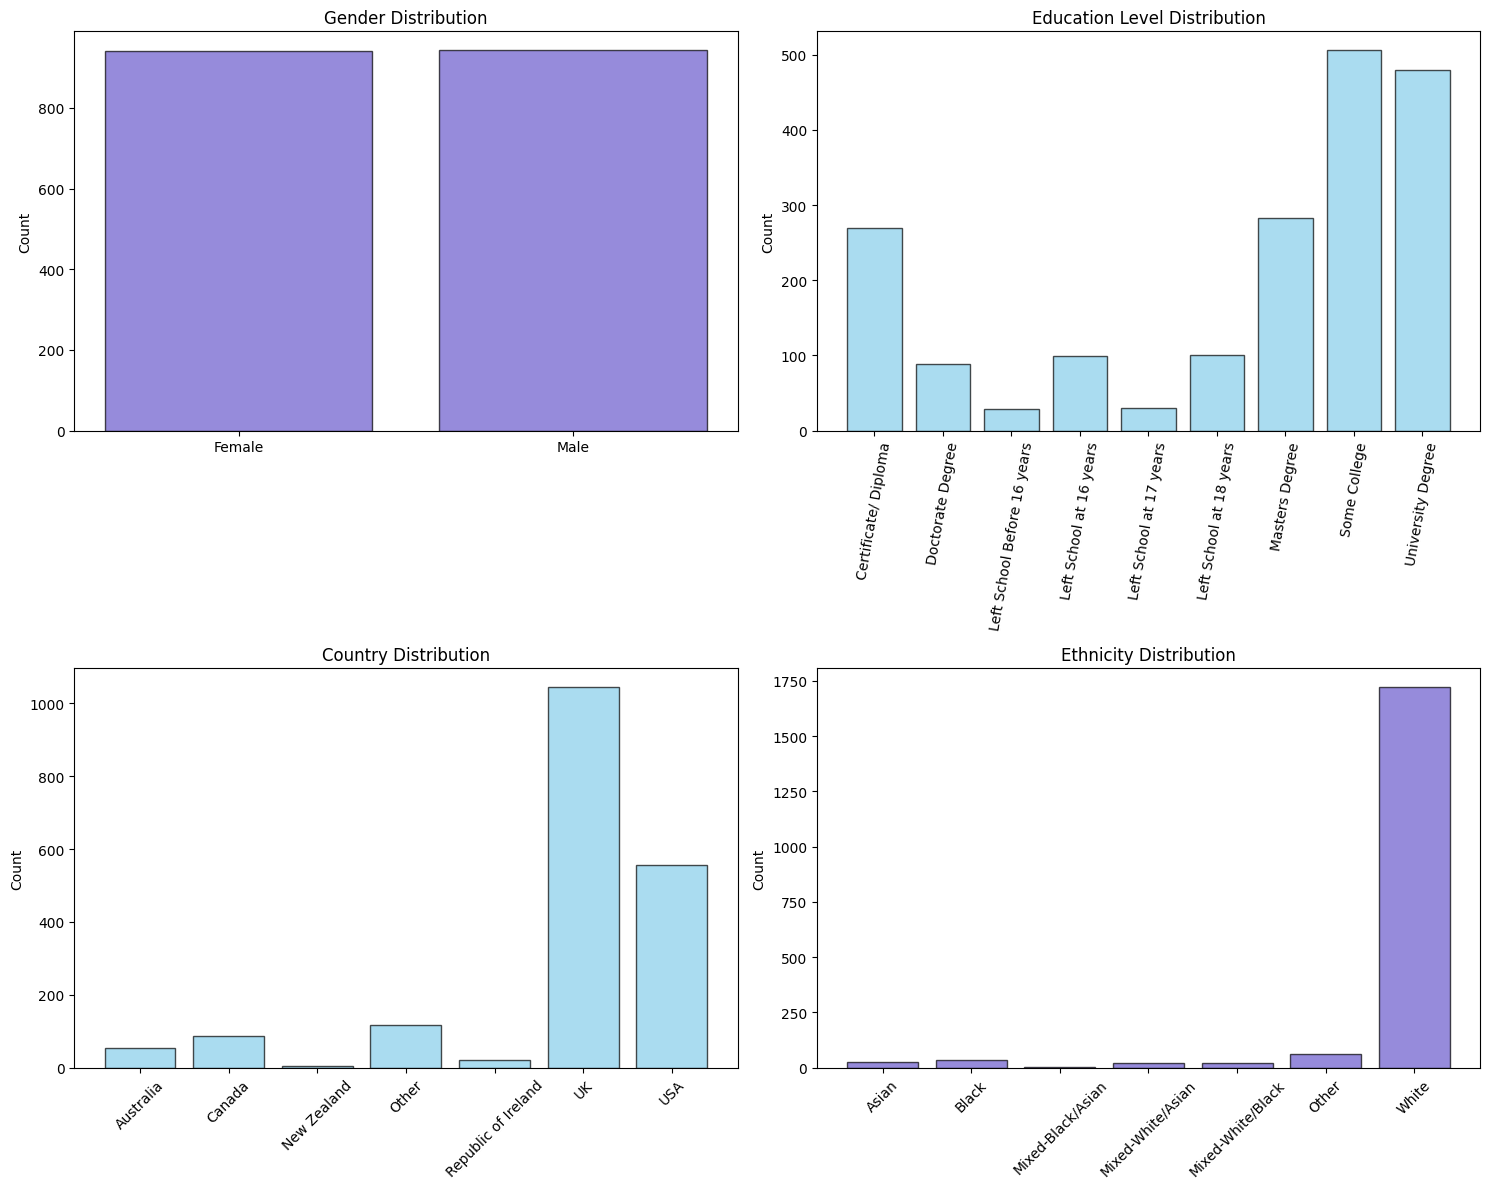

In [209]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Grafico a barre per la distribuzione del genere
gender_counts = data['Gender'].value_counts().sort_index()
axs[0, 0].bar(gender_counts.index, gender_counts.values, edgecolor='k', alpha=0.7, color='slateblue')
axs[0, 0].set_title('Gender Distribution')
axs[0, 0].set_ylabel('Count')

# Grafico a barre per la distribuzione del livello di educazione
education_counts = data['Education'].value_counts().sort_index()
axs[0, 1].bar(education_counts.index, education_counts.values, edgecolor='k', alpha=0.7, color='skyblue')
axs[0, 1].set_title('Education Level Distribution')
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_xticklabels(education_counts.index, rotation=80)

# Grafico a barre per la distribuzione del paese
country_counts = data['Country'].value_counts().sort_index()
axs[1, 0].bar(country_counts.index, country_counts.values, edgecolor='k', alpha=0.7, color='skyblue')
axs[1, 0].set_title('Country Distribution')
axs[1, 0].set_ylabel('Count')
axs[1, 0].set_xticklabels(country_counts.index, rotation=45)

# Grafico a barre per la distribuzione dell'etnia
ethnicity_counts = data['Ethnicity'].value_counts().sort_index()
axs[1, 1].bar(ethnicity_counts.index, ethnicity_counts.values, edgecolor='k', alpha=0.7, color='slateblue')
axs[1, 1].set_title('Ethnicity Distribution')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_xticklabels(ethnicity_counts.index, rotation=45)

plt.tight_layout()
plt.show()

In [210]:
data[drugs].describe()

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
count,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,4.635013,1.340584,0.606897,1.465252,5.483820,2.989390,5.106631,1.161273,0.297613,1.314058,0.374005,0.569231,1.355968,1.061538,0.826525,1.187268,3.200531,0.009549,0.433422
std,1.331253,1.783587,1.064210,1.867275,1.114648,2.287438,1.089315,1.513031,0.837053,1.647567,1.034779,1.220015,1.789647,1.491103,1.646632,1.466341,2.413932,0.159331,0.962375
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,5.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,6.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,6.000000,2.000000,1.000000,3.000000,6.000000,5.000000,6.000000,2.000000,0.000000,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,6.000000,0.000000,0.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.000000,6.000000


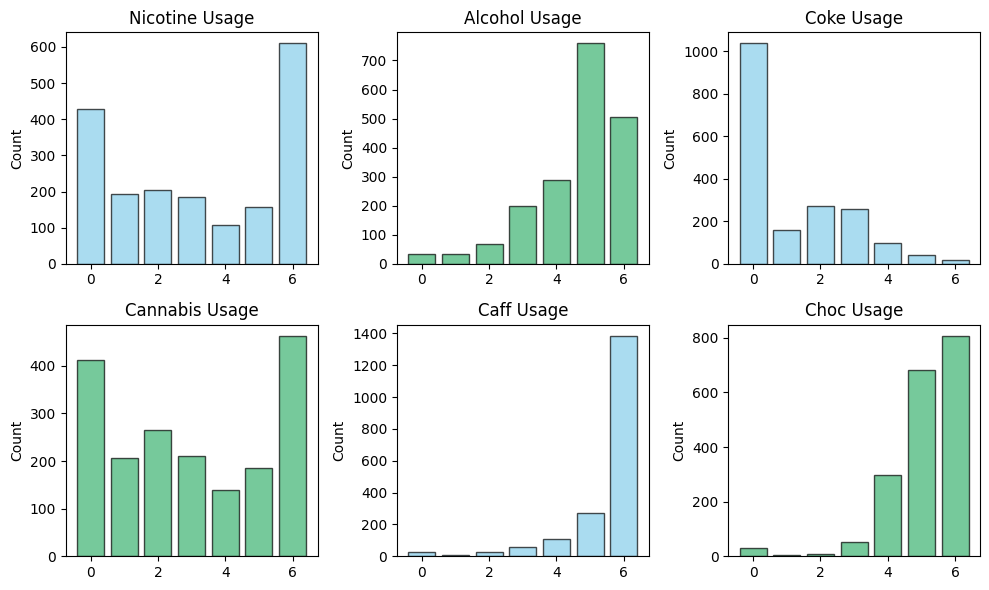

In [211]:
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

#Grafico a barre per l'uso di Nicotine
nicotine_counts = data['Nicotine'].value_counts().sort_index()
axs[0, 0].bar(nicotine_counts.index, nicotine_counts.values, edgecolor='k', alpha=0.7, color = 'skyblue')
axs[0, 0].set_title('Nicotine Usage')
axs[0, 0].set_ylabel('Count')

#Grafico a barre per l'uso di Alcohol
alcohol_counts = data['Alcohol'].value_counts().sort_index()
axs[0, 1].bar(alcohol_counts.index, alcohol_counts.values, edgecolor='k', alpha=0.7, color ='mediumseagreen')
axs[0, 1].set_title('Alcohol Usage')
axs[0, 1].set_ylabel('Count')

nicotine_counts = data['Coke'].value_counts().sort_index()
axs[0, 2].bar(nicotine_counts.index, nicotine_counts.values, edgecolor='k', alpha=0.7, color='skyblue')
axs[0, 2].set_title('Coke Usage')
axs[0, 2].set_ylabel('Count')

nicotine_counts = data['Cannabis'].value_counts().sort_index()
axs[1, 0].bar(nicotine_counts.index, nicotine_counts.values, edgecolor='k', alpha=0.7, color = 'mediumseagreen')
axs[1, 0].set_title('Cannabis Usage')
axs[1, 0].set_ylabel('Count')

nicotine_counts = data['Caff'].value_counts().sort_index()
axs[1, 1].bar(nicotine_counts.index, nicotine_counts.values, edgecolor='k', alpha=0.7, color = 'skyblue')
axs[1, 1].set_title('Caff Usage')
axs[1, 1].set_ylabel('Count')

nicotine_counts = data['Choc'].value_counts().sort_index()
axs[1, 2].bar(nicotine_counts.index, nicotine_counts.values, edgecolor='k', alpha=0.7, color = 'mediumseagreen')
axs[1, 2].set_title('Choc Usage')
axs[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

0: Never Used  
1: Used over a Decade Ago  
2: Used in Last Decade  
3: Used in Last Year  
4: Used in Last Month  
5: Used in Last Week  
6: Used in Last Day  

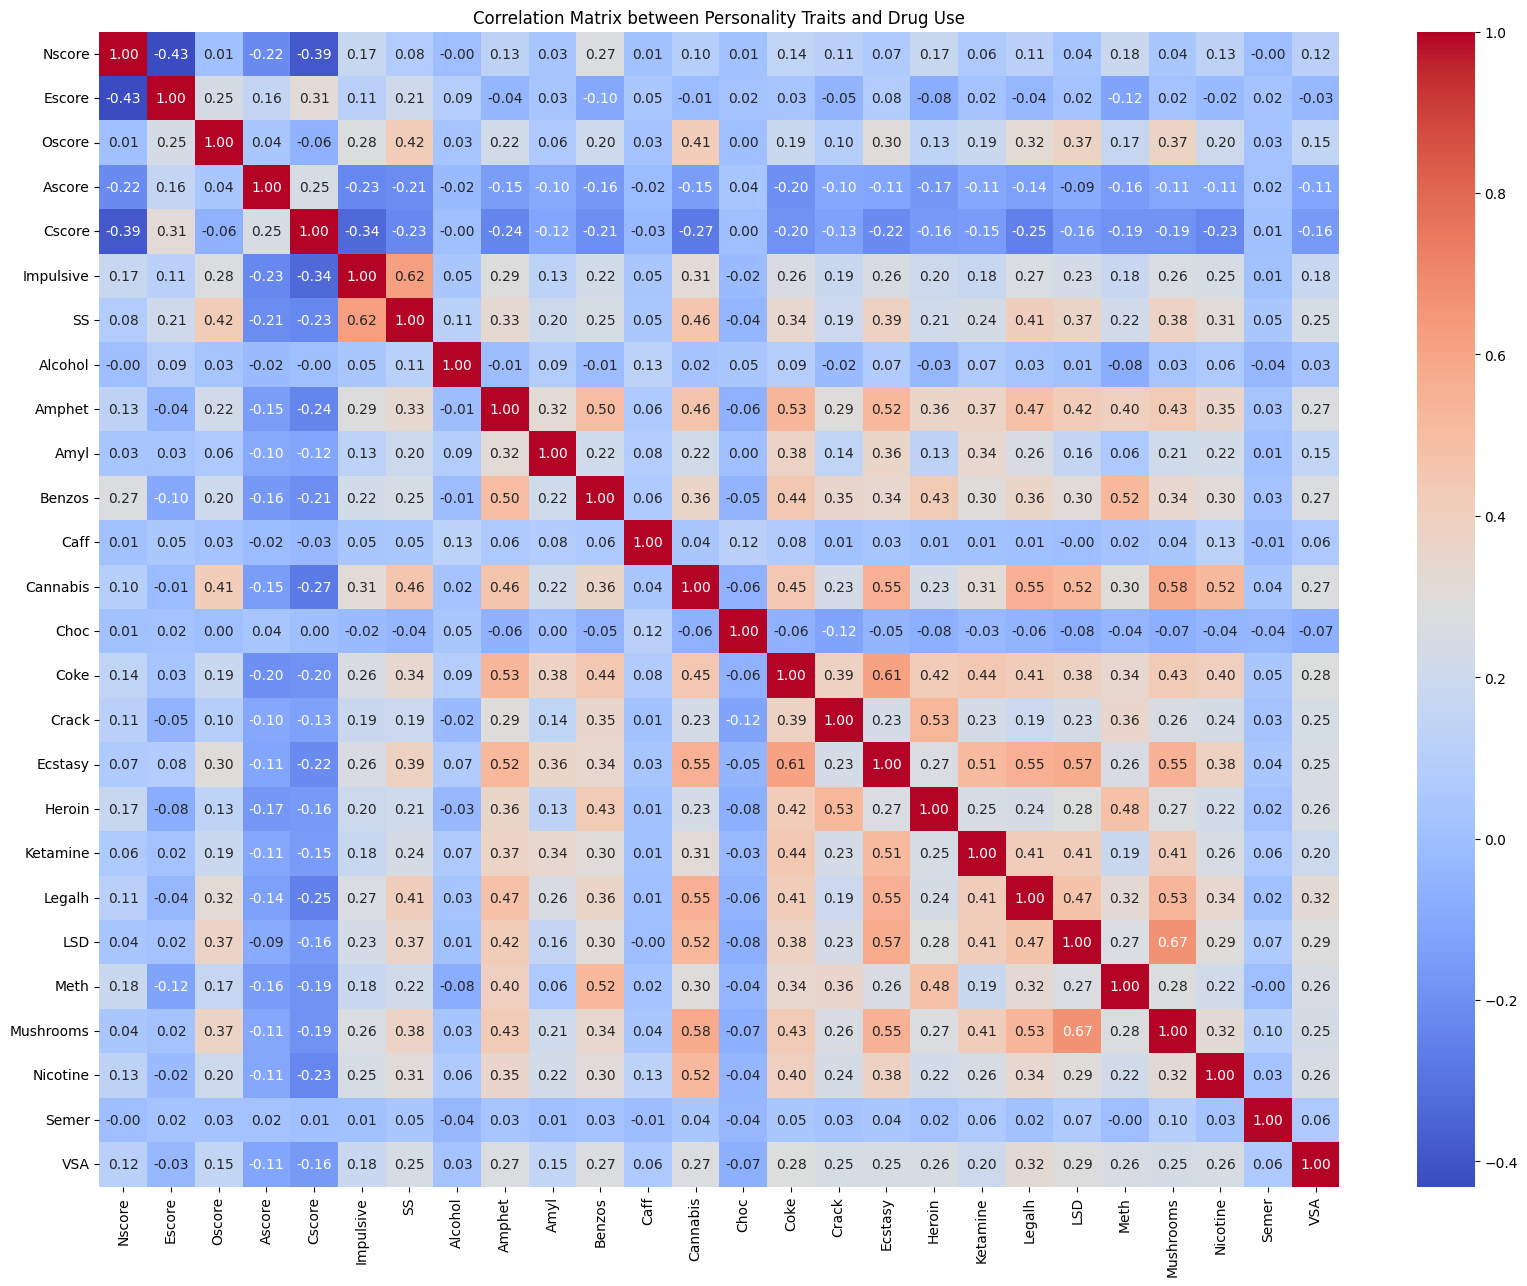

In [212]:
traits = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

#Creazione del DataFrame per la correlazione
correlation_data = data[traits + drugs]

#Calcolo della matrice di correlazione
correlation_matrix = correlation_data.corr()

#Visualizzazione della matrice di correlazione
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Personality Traits and Drug Use')
plt.show()

# MODEL

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Modello per prevedere se un individuo utilizzerà una specifica droga in base ai tratti della personalità e ad altri attributi.

In [214]:
# Scegli la colonna di destinazione
target = 'Cannabis'

# Seleziona le caratteristiche
features = traits + ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']

# Prepara i dati
X = data[features]
y = data[target]

# Codifica le variabili categoriche
label_encoder = LabelEncoder()
X['Age'] = label_encoder.fit_transform(X['Age'])
X['Gender'] = label_encoder.fit_transform(X['Gender'])
X['Education'] = label_encoder.fit_transform(X['Education'])
X['Country'] = label_encoder.fit_transform(X['Country'])
X['Ethnicity'] = label_encoder.fit_transform(X['Ethnicity'])

# Dividi i dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizza le caratteristiche
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inizializza il modello
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Addestra il modello
model.fit(X_train, y_train)

C:\Users\loris\AppData\Local\Temp\ipykernel_8568\2375258239.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = label_encoder.fit_transform(X['Age'])
C:\Users\loris\AppData\Local\Temp\ipykernel_8568\2375258239.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = label_encoder.fit_transform(X['Gender'])
C:\Users\loris\AppData\Local\Temp\ipykernel_8568\2375258239.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

RandomForestClassifier(random_state=42)

In [215]:
# Fai previsioni
y_pred = model.predict(X_test)
# Previsioni sul set di addestramento
y_train_pred = model.predict(X_train)

# Calcola l'accuratezza sul set di addestramento
accuracy_train = accuracy_score(y_train, y_train_pred)

# Calcola l'errore di classificazione sul set di addestramento
classification_error_train = 1 - accuracy_train

# Previsioni sul set di test
y_test_pred = model.predict(X_test)

# Calcola l'accuratezza sul set di test
accuracy_test = accuracy_score(y_test, y_test_pred)

# Calcola l'errore di classificazione sul set di test
classification_error_test = 1 - accuracy_test

In [217]:
print(f'Train Classification Error: {classification_error_train:.2f}')
print(f'Test Classification Error: {classification_error_test:.2f}')

Train Classification Error: 0.00
Test Classification Error: 0.59


In [218]:
# Valutazione del modello
print(classification_report(y_test, y_test_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_test_pred))
print('Accuracy Score:', accuracy_test)

              precision    recall  f1-score   support

           0       0.52      0.71      0.60        86
           1       0.38      0.39      0.39        28
           2       0.16      0.13      0.14        55
           3       0.20      0.04      0.06        57
           4       0.12      0.04      0.06        27
           5       0.21      0.09      0.13        32
           6       0.45      0.76      0.57        92

    accuracy                           0.41       377
   macro avg       0.29      0.31      0.28       377
weighted avg       0.34      0.41      0.35       377

Confusion Matrix:
 [[61 10  9  0  0  0  6]
 [10 11  3  1  1  0  2]
 [27  2  7  1  0  3 15]
 [10  2 12  2  4  2 25]
 [ 1  4  3  1  1  2 15]
 [ 2  0  4  1  1  3 21]
 [ 7  0  6  4  1  4 70]]
Accuracy Score: 0.41114058355437666
